In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
for i in range(60000):
    if y_train[i] == 4 or y_train[i] == 5:
        y_train[i] = 0
    if y_train[i] == 6 or y_train[i] == 7:
        y_train[i] = 1
    if y_train[i] == 8:
        y_train[i] = 2
    if y_train[i] == 9:
        y_train[i] = 3
for i in range(10000):
    if y_test[i] == 4 or y_test[i] == 5:
        y_test[i] = 0
    if y_test[i] == 6 or y_test[i] == 7:
        y_test[i] = 1
    if y_test[i] == 8:
        y_test[i] = 2
    if y_test[i] == 9:
        y_test[i] = 3

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(4,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 42s 21ms/step - loss: 0.3007 - accuracy: 0.8920
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0821 - accuracy: 0.9721TA: 0s - loss: 0.0821 - accuracy: 0.
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0505 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0408 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0261 - accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0170 - accuracy: 0.9939
Epoch 10/10
1875/1875 [=====

313/313 [==============================] - 2s 7ms/step - loss: 0.0585 - accuracy: 0.9851


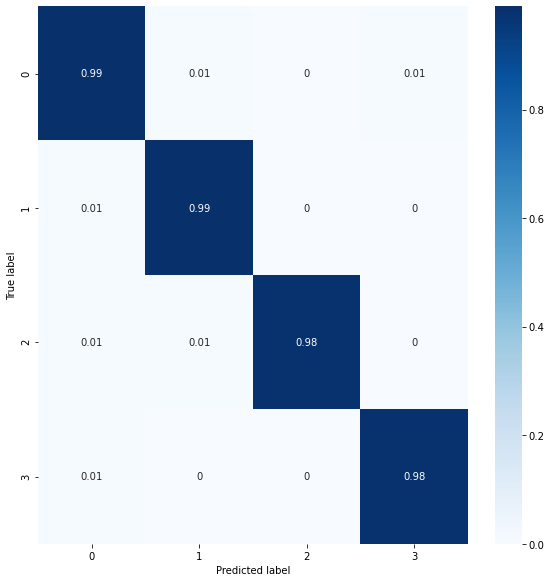

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

model.evaluate(x_test, y_test)

y_pred=model.predict_classes(x_test)
classes = [0,1,2,3]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
index = classes,
columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()